## Hipótesis relativa a una media.
#### Ditribución normal - Desvío Estandar **desconocido**
###### https://www.chreinvent.com/recursos/hip%C3%B3tesis-sobre-media

In [1]:
import math
from statistics import mean, stdev, median, mode
import matplotlib.pyplot as plt
import scipy.stats as stats
from fitter import Fitter
from dist_prob_plotgraphs import distr_prob, reg_critica

## Control de calidad  de los dulces  M&M
+ Un conjunto de datos incluye los pesos de 13 dulces M&M rojos, elegidos al azar de una bolsa que contiene 465 dulces M&M.
+ **La desviación estándard de todos los 465 dulces es desconocido**
+ A continuación se presentan los pesos (en gramos), los cuales tienen una media de x = 0.8635 y una desviación estándar de s =  0.0576 g. 
    + 0.751,   0.841,   0.856,   0.799,    0.966,    0.859,   0.857,   0.942,   0.873,   0.809,   0.890,   0.878,   0.905
+ En el empaque se afirma que el peso neto del contenido es 396.9 g, de manera que los M&M deben tener un peso medio de al menos 396.9/465 = 0.8535 g 
    + para dar la cantidad anunciada. 

+ Utilice los datos muestrales con un nivel de significancia de 0.05, 
    + para probar la aseveración que hizo un gerente de producción de que los M&M tienen en realidad una media mayor que 0.8535 g, 
    + de manera que los consumidores están recibiendo más que la cantidad indicada en la etiqueta. 

## Análisis de la muestra

In [2]:
mmsample = [0.751, 0.841, 0.856, 0.799, 0.966, 0.859, 0.857, 0.942, 0.873, 0.809, 0.890, 0.878, 0.905]

### Requisitos de la muestra
1. La muestra es aleatoria simple.
2. Se **desconoce** el valor de la desviación estándar poblacional 𝞂.
3. Se satisface una o ambas de las siguientes condiciones: 
    + la población se distribuye normalmente o
    + n > 30.

Antes de iniciar cualquier procedimiento de prueba de hipótesis, 
+ debemos explorar primero el conjunto de datos y 
+ verificar que los requisitos de la prueba específica se cumplan.

Para esto es preciso observar a) Estadísticos de la muestra y b) Normalidad

## Estadísticos de la muestra

In [3]:
me, sd = mean(mmsample), stdev(mmsample)
mi, ma = min(mmsample), max(mmsample)
print(f"media:{me}, desvío estandard:{sd}, minimo:{mi}")

media:0.8635384615384616, desvío estandard:0.05759429280842471, minimo:0.751


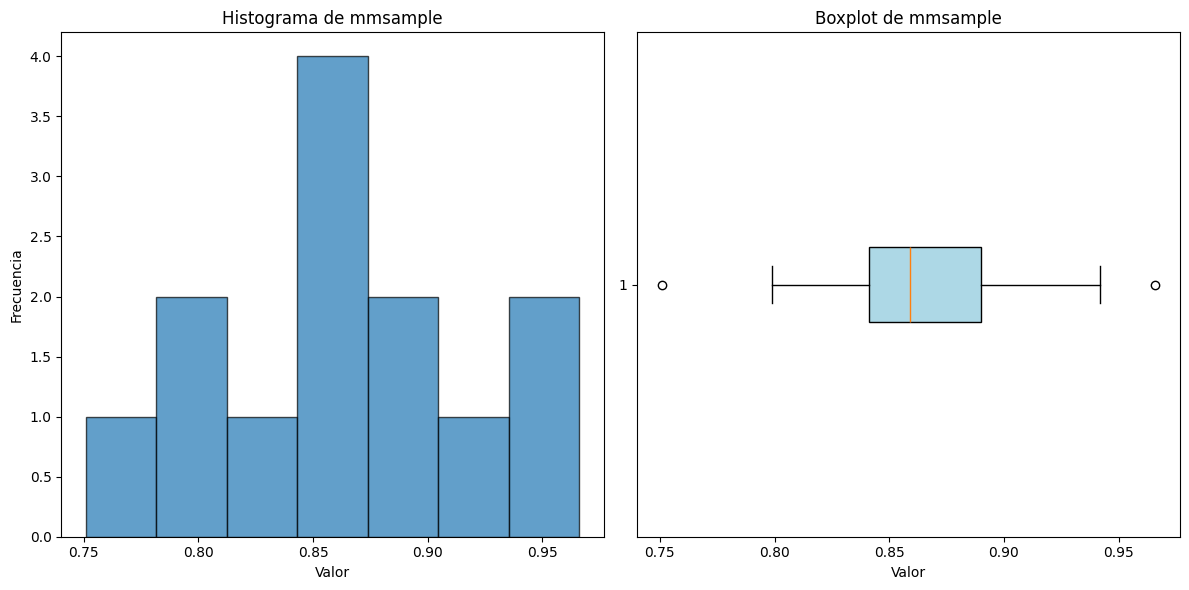


Estadísticos en orden para ver en grafica: Observaciones: 13, Rango: 0.215.
min: 0.751,   -1sd: -0.058,   mode: 0.751,   median: 0.859,   media: 0.864,   +1sd: 0.058,   max: 0.966
First quartile (Q1): 0.809
Third quartile (Q3): 0.89
Interquartile range (IQR): 0.081
Lower limit: 0.688
Upper limit: 1.011


In [4]:
# Configuración de los gráficos
plt.figure(figsize=(12, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(mmsample, bins=7, edgecolor='black', alpha=0.7)
plt.title('Histograma de mmsample')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(mmsample, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de mmsample')
plt.xlabel('Valor')

# Mostrar gráficos
plt.tight_layout()
plt.show()

print(f"\nEstadísticos en orden para ver en grafica: Observaciones: {len(mmsample)}, Rango: {(ma - mi):.3f}.")
# Medidas de tendencia central
print(f"min: {mi},   -1sd: {-sd:.3f},   mode: {mode(mmsample)},   median: {median(mmsample)},"\
      f"   media: {me:.3f},   +1sd: {sd:.3f},   max: {ma}")
import numpy as np

def calculate_iqr_and_boxplot_limits(data):
  """
  This function calculates the interquartile range (IQR), quartiles, 
  and upper and lower limits for a boxplot.

  Args:
      data: A list or NumPy array of numerical data.

  Returns:
      A dictionary containing the following keys:
          - 'Q1': The first quartile (25th percentile).
          - 'Q3': The third quartile (75th percentile).
          - 'IQR': The interquartile range (IQR).
          - 'lower_limit': The lower limit for the boxplot.
          - 'upper_limit': The upper limit for the boxplot.
  """

  # Sort the data in ascending order
  data = np.sort(data)

  # Calculate the number of data points
  n = len(data)

  # Check for empty data
  if n == 0:
    return {
      'Q1': None,
      'Q3': None,
      'IQR': None,
      'lower_limit': None,
      'upper_limit': None,
    }

  # Find the quartiles based on even or odd number of data points
  if n % 2 == 0:
    Q1_index = int(n / 4) - 1
    Q3_index = int(n / 4 * 3) - 1
  else:
    Q1_index = int((n + 1) / 4) - 1
    Q3_index = int((n + 1) / 4 * 3) - 1

  # Calculate the quartiles
  Q1 = data[Q1_index]
  Q3 = data[Q3_index]

  # Calculate the interquartile range
  IQR = Q3 - Q1

  # Calculate the upper and lower limits
  lower_limit = Q1 - 1.5 * IQR
  upper_limit = Q3 + 1.5 * IQR

  return {
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR,
    'lower_limit': lower_limit,
    'upper_limit': upper_limit,
  }

# Example usage
data = mmsample
results = calculate_iqr_and_boxplot_limits(data)

print(f"First quartile (Q1): {results['Q1']}")
print(f"Third quartile (Q3): {results['Q3']}")
print(f"Interquartile range (IQR): {results['IQR']:.3f}")
print(f"Lower limit: {results['lower_limit']:.3f}")
print(f"Upper limit: {results['upper_limit']:.3f}")


### Análisis de normalidad de los datos de la muestra

Shapiro-Wilk Test
Evalúa la hipótesis nula de que una muestra proviene de una distribución normal. Es una prueba muy sensible para muestras pequeñas.
Shapiro-Wilk Test: ShapiroResult(statistic=0.9804171897795831, pvalue=0.9814750796533855)
Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.

Anderson-Darling Test
Evalúa la hipótesis nula de que los datos siguen una distribución específica (por defecto, normal).
Anderson-Darling Test: AndersonResult(statistic=0.2001265003776389, critical_values=array([0.497, 0.566, 0.679, 0.792, 0.942]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=0.8635384615384615, scale=0.057594292808424714)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
El resultado incluye un estadístico de prueba y una serie de valores críticos.
Si el estadístico es mayor que los valores críticos correspondientes a ciertos niveles de signific

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


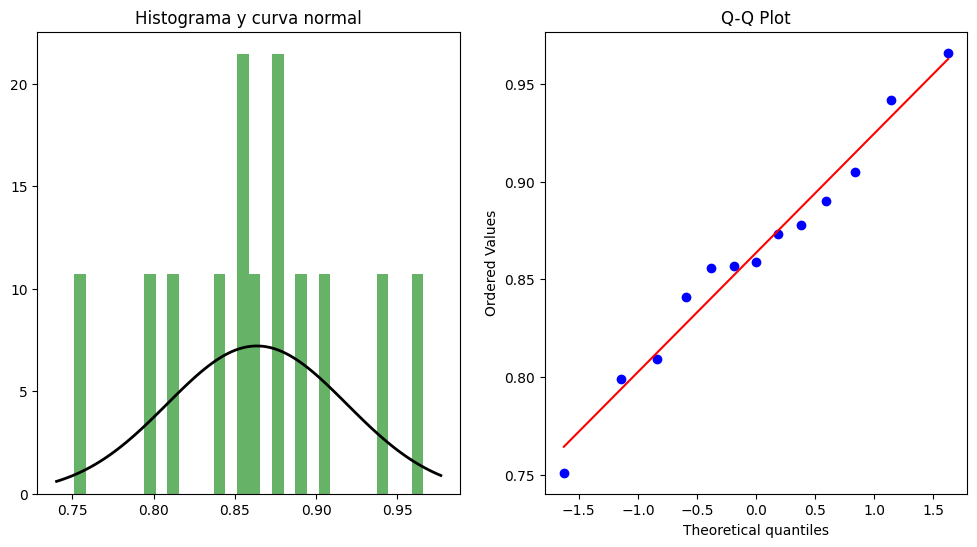

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,14197.870441,-264.461136,-263.331237,inf,0.138126,0.936521
lognorm,14197.870881,-262.461106,-260.766258,inf,0.138127,0.936517
gamma,14200.796575,-262.411610,-260.716762,inf,0.142838,0.919677
expon,15226.634521,-241.846251,-240.716352,inf,0.319779,0.110845


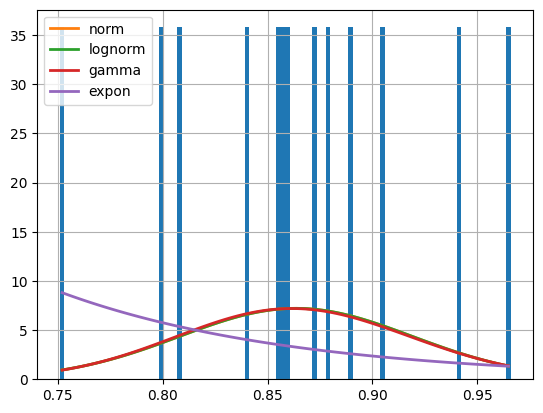

In [5]:
# Pruebas de normalidad
shapiro_test = stats.shapiro(data)
anderson_test = stats.anderson(data, dist='norm')
dagostino_test = stats.normaltest(data)

print("Shapiro-Wilk Test")
print("Evalúa la hipótesis nula de que una muestra proviene de una distribución normal. Es una prueba muy sensible para muestras pequeñas.")
print("Shapiro-Wilk Test:", shapiro_test)
print("Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.\n")

print("Anderson-Darling Test")
print("Evalúa la hipótesis nula de que los datos siguen una distribución específica (por defecto, normal).")
print("Anderson-Darling Test:", anderson_test)
print("El resultado incluye un estadístico de prueba y una serie de valores críticos.\n"
      f"Si el estadístico es mayor que los valores críticos correspondientes a ciertos niveles de significancia, se rechaza la hipótesis nula.\n")

print("D'Agostino's K-squared Test")
print("Compara una muestra con una distribución de referencia (normal en este caso).")
print("D'Agostino's K-squared Test:", dagostino_test)
print("Si el valor p es menor que 0.05, se rechaza la hipótesis nula, sugiriendo que los datos no son normales.\n")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, loc=np.mean(data), scale=np.std(data))
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histograma y curva normal")

plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")

plt.show()

# Ajuste de distribución con Fitter
f = Fitter(data, distributions=['norm', 'lognorm', 'expon', 'gamma'])
f.fit()
f.summary()

**Observaciones**
Luego de realizados 5 test de normalidad se concluye que es aceptable modelar esta muestra con una distribución normal
###### https://www.chreinvent.com/recursos/an%C3%A1lisis-de-normalidad
###### https://github.com/DaniCh-Coder/Python-Notes/blob/main/ps%20stats/Probability-distributions/dp-norm-testing.ipynb

## Distribución t-Student de la Población
Debe notarse que se analiza la media muestral en relación a la población.
+ La población en este caso serían los 465 dulces
    + En el empaque se afirma que el peso neto del contenido es 396.9 g, de manera que los M&M deben tener un peso medio de al menos 396.9/465 = 0.8535 g 
    + para dar la cantidad anunciada.
+ Se sabe también (por que se ha calculado) que la desviación estándard de todos los 465 dulces de 0.0565 

dist: t, is_standard: False, dist.mean: 0.8535483870967742, dist.std:0.06189264899808377


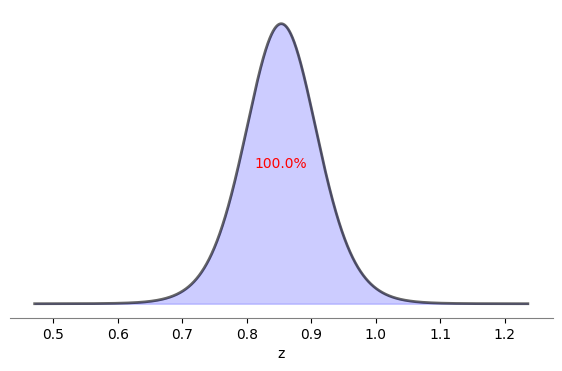

In [23]:
# Distribución t-Student
mep, sdp = 396.9/465, 0.0565 
df = 12
fig, ax = distr_prob(stats.t(df=df, loc=mep, scale=sdp))

## Hipótesis del gerente de producción
+ Probar la aseveración que hizo un gerente de producción de que los M&M tienen en realidad una media mayor que 0.8535 g, 
    + de manera que los consumidores *están recibiendo más que la cantidad indicada en la etiqueta*. 
## Prueba de hipótesis
+ Para probar la hipótesis que los consumidores *están recibiendo más que la cantidad indicada en la etiqueta*
    + comparamos la media de la con la media de la población y
    + vemos dónde se ubica la media de la muestra en comparación con la región crítica.
## H0 y H1
+ Definimos
    + Hipótesis Nula H0: µ = 0.854
    + Hipótesis Alternativa: µ > 0.854

## Analisis del intervalo de confianza de la población
+ El IC nos dice con una probabilidad del 95% el rango de valores posibles para la media de la población
+ Es un primer análisis aproximado:
    + Si el valor de la media de la muestra entre dentro del intevalo de confianza entonces es un valor posible por azar

media: 0.8535483870967742, desv.std.: 0.06189264899808377 , sesgo: 0.0, kurtosis: 0.75)
α: 5.0%.
Probs. acums.     : 0.025 y 0.025.
Prob. a + b       : 5.00%.
Percentiles a y b : 0.025 y 0.975
Valores de x      : 0.730 y 0.977.
Valores de Z o S  : -1.99 y 1.99
dist: t, is_standard: False, dist.mean: 0.8535483870967742, dist.std:0.06189264899808377


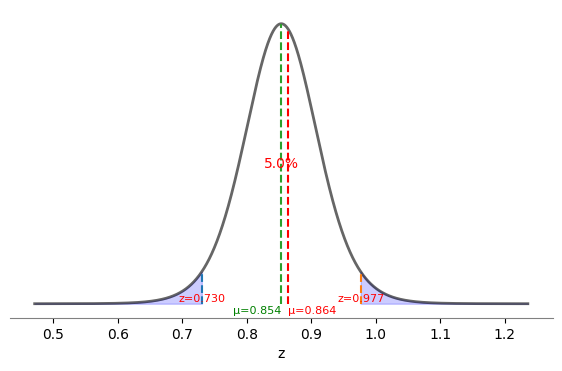

In [22]:
# Análisis de la Región Crítica con t-Student
df= 12
fig, ax = reg_critica(stats.t(df=df,loc=mep, scale=sdp))
# dibuja la línea de la media de la población
ax.plot([mep, mep], [0, stats.t.pdf(x=mep, df=df, loc=mep,scale=sdp)], linestyle="dashed")  # dibuja la línea punteada
ax.text(x=mep, y=-0.3, s=f'µ={mep:.3f}', ha='right', va='bottom', fontsize=8, color='g')   # Añade valor de x de la muestra

# dibuja la línea de la media de la muestra
ax.plot([me, me], [0, stats.t.pdf(x=me, df=df, loc=mep,scale=sdp)], linestyle="dashed", color='red')  # dibuja la línea punteada
ax.text(x=me, y=-0.3, s=f'µ={me:.3f}', ha='left', va='bottom', color='red', fontsize=8)   # Añade valor de x de la muestra

plt.show(fig)

**Observaciones**
+ La media de la muestra está dentro del IC intervalo de confianza del 95%
+ La media de la muestra esta proxima a la media de la población 

### **Conclusiones del análisis del intervalo de confianza**
+ Es muy probable que µ = 0.864 haya aparecido como consecuencia del azar
+ Observando el intervalo de confianza la H0 parece aceptable

## Análisis del estadístico de prueba µ y la región crítica
+ Es un análisis más exahustivo que el anterior
    + Si el estadístico de la muestra entra dentro de la región crítica la H0 se rechaza
    + Si el estadístico de la muestra está fuera de la región crítica la H0 no se puede rechazar

z:0.6254044261819193
media: 0.8535483870967742, desv.std.: 0.06189264899808377 , sesgo: 0.0, kurtosis: 0.75)
α: 5.0%.
Prob. acum.     : 0.050 = 5.00%.
Percentiles a y b : 0.950 y 1.000
Valores de x      : 0.954 y inf.
Valores de Z o S  : 1.63 y inf
dist: t, is_standard: False, dist.mean: 0.8535483870967742, dist.std:0.06189264899808377


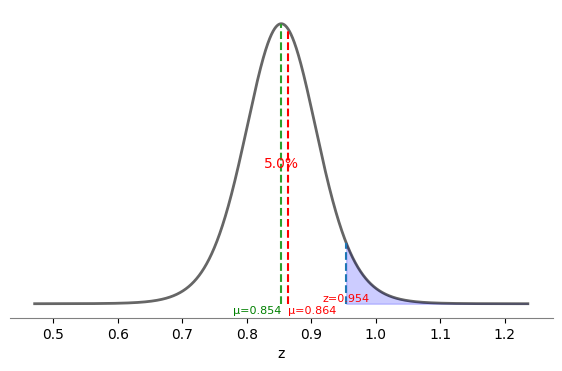

In [20]:
# Análisis del estadístico µ
df=12
z = (me - mep) / (sd / math.sqrt(13))
print(f"z:{z}")
fig, ax = reg_critica(stats.t(df=df, loc=mep, scale=sdp), side='right')

# dibuja la línea de la media de la población
ax.plot([mep, mep], [0, stats.t.pdf(x=mep, df=df, loc=mep, scale=sdp)], linestyle="dashed")  # dibuja la línea punteada
ax.text(x=mep, y=-0.3, s=f'µ={mep:.3f}', ha='right', va='bottom', fontsize=8, color='g')   # Añade valor de x de la muestra

# dibuja la línea de la media de la muestra
ax.plot([me, me], [0, stats.t.pdf(x=me, df=df, loc=mep,scale=sdp)], linestyle="dashed", color='red')  # dibuja la línea punteada
ax.text(x=me, y=-0.3, s=f'µ={me:.3f}', ha='left', va='bottom', color='red', fontsize=8)   # Añade valor de x de la muestra

plt.show(fig)

**Observaciones**
+ La media de la muestra está fuera de la zona crítica del nivel de signifiancia alfa marcada en lila
+ La media de la muestra esta proxima a la media de la población y fuera de la zona crítica

### **Conclusiones del análisis del estadístico de prueba (Media)**
+ Es muy probable que µ = 0.864 haya aparecido como consecuencia del azar

### **Análisis del valor P**
+ Con el estadístico de prueba se puede analizar el valor P en contraste con α

dist: t, is_standard: False, dist.mean: 0.8535483870967742, dist.std:0.06189264899808377


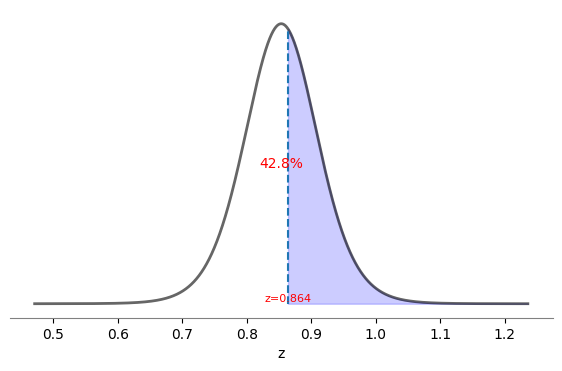

In [19]:
# Analisis del valor P con t-Student
df=12
fig, ax = distr_prob(stats.t(df=df, loc=mep, scale=sdp), a=0.864)

**Observaciones**
+ El valor P asociado al estadístico de prueba µ = 0.864 es mucho mayor que α
    + Es la región sobreada de la figura: 42.7% >> 5%
### **Conclusiones del valor P del estadístico de Prueba**
+ El valor P es tan alto que hace aceptable la Hipótesis Nula H0
+ No se puede rechazar la H0: µ = 0.854

## **Conclusiones finales**
+ En este estudio, una media muestral como 0.8635 puede presentarse fácilmente por azar con una media poblacional de 0.8535. 
+ No existe evidencia suficiente para sustentar la conclusión de que la media poblacional sea mayor que 0.8535, 
    + como afirmó el gerente de producción.

___________________________________________________________________________________________________________________________________________________________________